Rules for Conway's Game of Life
==============================
* Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.
* Any live cell with two or three live neighbours lives on to the next generation.
* Any live cell with more than three live neighbours dies, as if by overpopulation.
* Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [7]:
from IPython.display import display, clear_output

In [8]:
def check_valid_cell(x, y, N):
    return (0 <= x < N) and (0 <= y < N)

In [9]:
# only support square grids
N = 20

start_cells = [
    (0,1), (1,0), (1,1), (1,2), (2,1),
    (10,0), (10,1), (10,2),
]

assert all([check_valid_cell(x,y,N) for x, y in start_cells])

In [10]:
def print_grid(cells, N):
    string = ""
    for y in range(N):
        for x in range(N):
            if (x,y) in cells:
                string += "■"
            else:
                string += "□"
        string += "\n"
    print(string)

In [11]:
for _ in range(10):
    clear_output(wait=True)
    print_grid(start_cells, N)

    

□■□□□□□□□□■□□□□□□□□□
■■■□□□□□□□■□□□□□□□□□
□■□□□□□□□□■□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□□□□



In [12]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [13]:
def print_grid_plotly(cells, fig):
    x, y = zip(*cells)
    
    fig.data = []
    
    fig.add_trace(
        go.Scatter(
            x=x, 
            y=y,
            mode="markers",
            marker=dict(symbol="square-open", size=15),
            line=dict(width=1,color='black')
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=x, 
            y=y,
            mode="markers",
            marker=dict(symbol="square", size=15),
            line=dict(width=1,color='black')
        )
    )


    fig = (
        fig
        .update_layout(showlegend=False)
        .update_xaxes(visible=False)
        .update_yaxes(visible=False)
    )
    fig['layout'].update(width=500, height=500, autosize=False)
    fig.show()

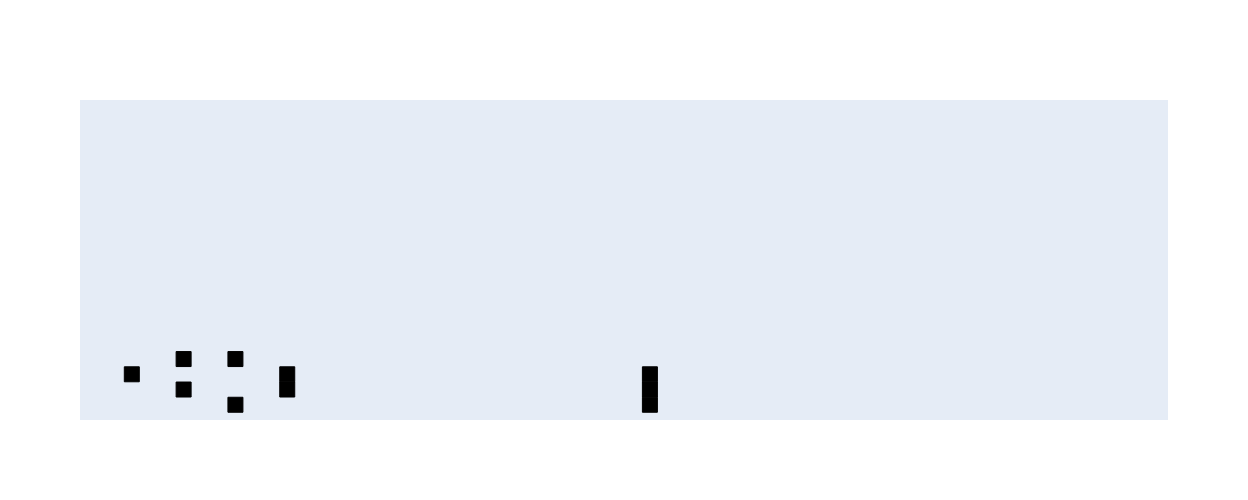

In [14]:
from itertools import product
from time import sleep
from copy import deepcopy

next_cells = start_cells
fig = go.Figure(layout_yaxis_range=[-1, N], layout_xaxis_range=[-1, N])

x, y = zip(*product(range(20), repeat=2))


i = 0

while True:
    cells = deepcopy(next_cells)
    next_cells = []
    
    clear_output(wait=True)
    print_grid_plotly(cells, fig)
    sleep(0.5)
    
    for x in range(N):
        for y in range(N):
            # for each cell, get all of the neighbour indices
            # checking that the indices are within the grid
            current_cell = (x, y)
            cell_alive = current_cell in cells
            
            neighbours = product(
                range(x-1, x+2),
                range(y-1, y+2),
            )
            
            # count the number of live neighbours
            live_neighbours = len(
                [
                    n for n in neighbours
                    if not n == current_cell
                    and check_valid_cell(*current_cell, N)
                    and n in cells
                ]
            )

            if cell_alive and live_neighbours in [2, 3]:
                    next_cells.append(current_cell)
                
            elif not cell_alive and live_neighbours == 3:
                    next_cells.append(current_cell)
                

            
    if next_cells == cells:
        break
    
    if i == 20: break
    i += 1

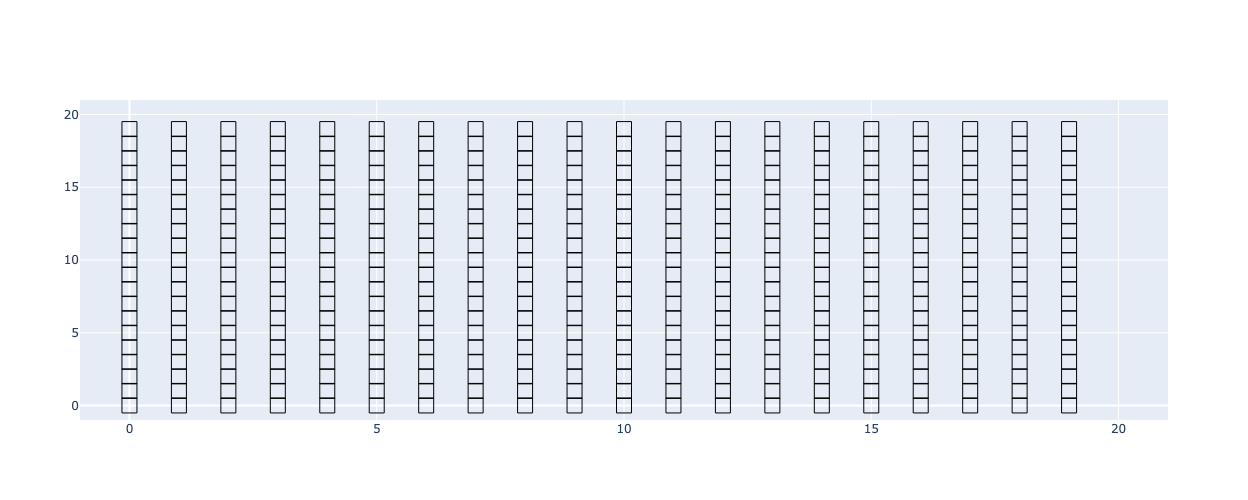

In [15]:
fig = go.Figure(layout_yaxis_range=[-1, N+1], layout_xaxis_range=[-1, N+1])
fig['layout'].update(width=500, height=500, autosize=False)

x, y = zip(*product(range(20), repeat=2))
fig.add_trace(
    go.Scatter(
        x=x, 
        y=y,
        mode="markers",
        marker=dict(symbol="square-open", size=15),
        line=dict(width=1,color='black')
    )
)
fig.show()